<a href="https://colab.research.google.com/github/Shobhit-2510/Retail-Demand-Forecasting/blob/main/Retail_Demand_Forecasting_via_Gradient_Boosting_and_Feature_Encoding_in_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dependencies

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Data Collection and Analysis

In [191]:
df = pd.read_csv("/content/drive/MyDrive/Datasets_for_ML_Projects/Big Mart Sales Data/Train.csv")

In [192]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [193]:
df.shape

(8523, 12)

In [194]:
# getting some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Some values are missing in Item_Weight

Categorical Features
- Item_Identifier            
- Item_Fat_Content           
- Item_Type                  
- Outlet_Identifier          
- Outlet_Size                
- Outlet_Location_Type       
- Outlet_Type                

In [195]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


## Handling Missing Values

In [196]:
# mean of Item_Weight
mean = df['Item_Weight'].mean()

In [197]:
# filling missing values with mean in Item_Weight
df['Item_Weight'] = df['Item_Weight'].fillna(mean)

In [198]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [199]:
# mode of Outlet_Size
mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [200]:
mode['Grocery Store'].iloc[0]

'Small'

In [201]:
for i in range(df.shape[0]):
  if pd.isnull(df['Outlet_Size'][i]):
    df.loc[i,'Outlet_Size'] = mode[df.loc[i, 'Outlet_Type']].iloc[0]

In [202]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


# Data Analysis

In [203]:
# statistical measures of data
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Numerical Features

In [204]:
sns.set()

<Figure size 1000x800 with 0 Axes>

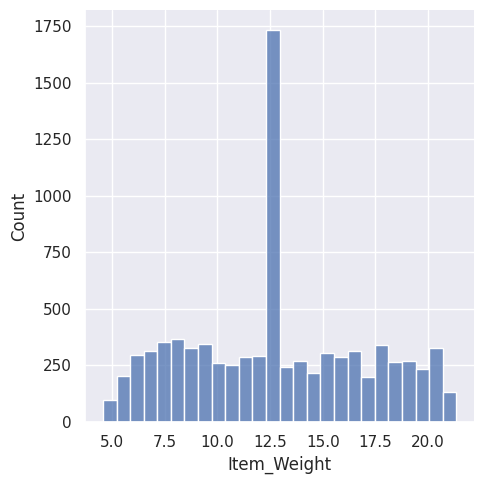

In [205]:
plt.figure(figsize=(10,8))
sns.displot(df['Item_Weight'])
plt.show()

<Figure size 1000x800 with 0 Axes>

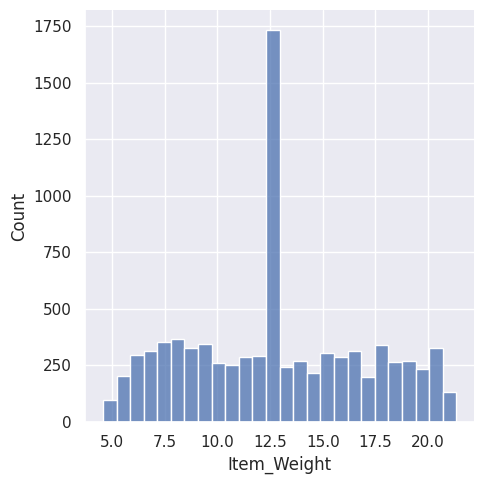

In [206]:
plt.figure(figsize=(10,8))
sns.displot(df['Item_Weight'])
plt.show()

<Figure size 1000x800 with 0 Axes>

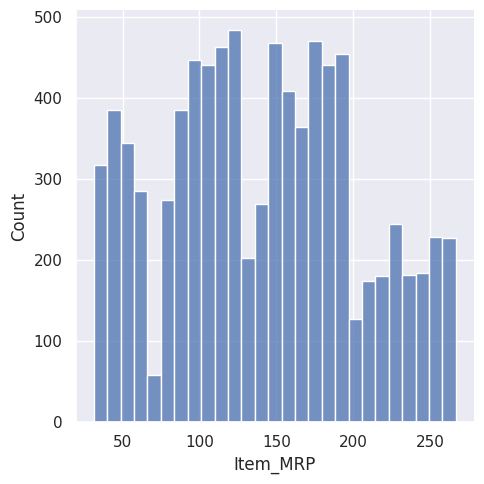

In [207]:
plt.figure(figsize=(10,8))
sns.displot(df['Item_MRP'])
plt.show()

<Figure size 1000x800 with 0 Axes>

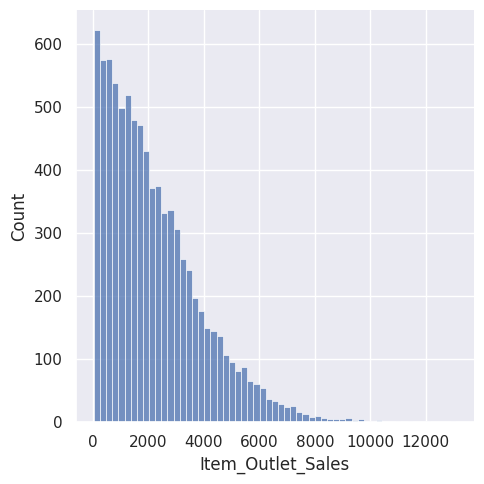

In [208]:
plt.figure(figsize=(10,8))
sns.displot(df['Item_Outlet_Sales'])
plt.show()

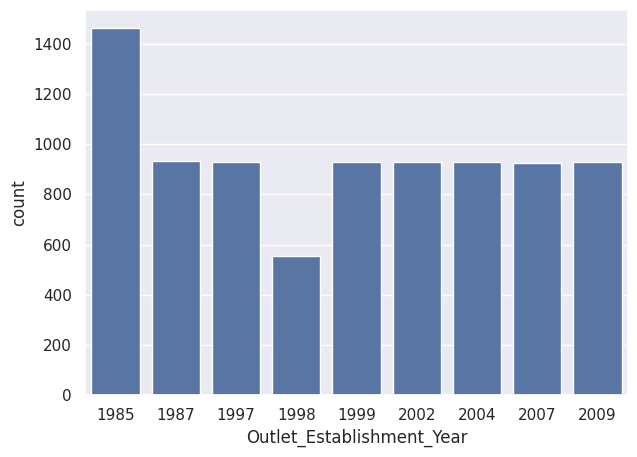

In [209]:
plt.figure(figsize=(7,5))
sns.countplot(x = df['Outlet_Establishment_Year'])
plt.show()

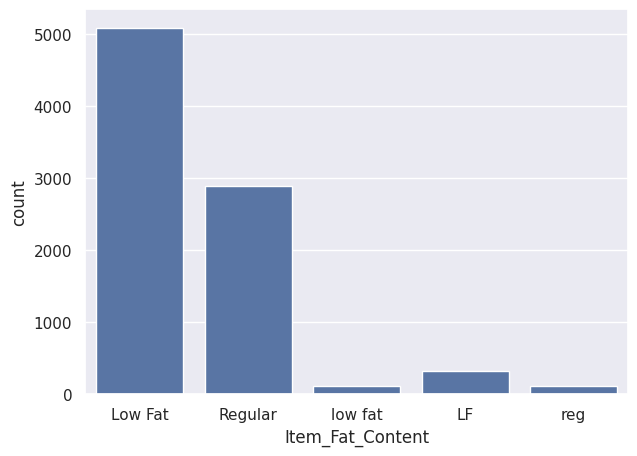

In [210]:
plt.figure(figsize=(7,5))
sns.countplot(x = df['Item_Fat_Content'])
plt.show()

Low Fat = LF = low fat and Regular = reg, We need to merge both

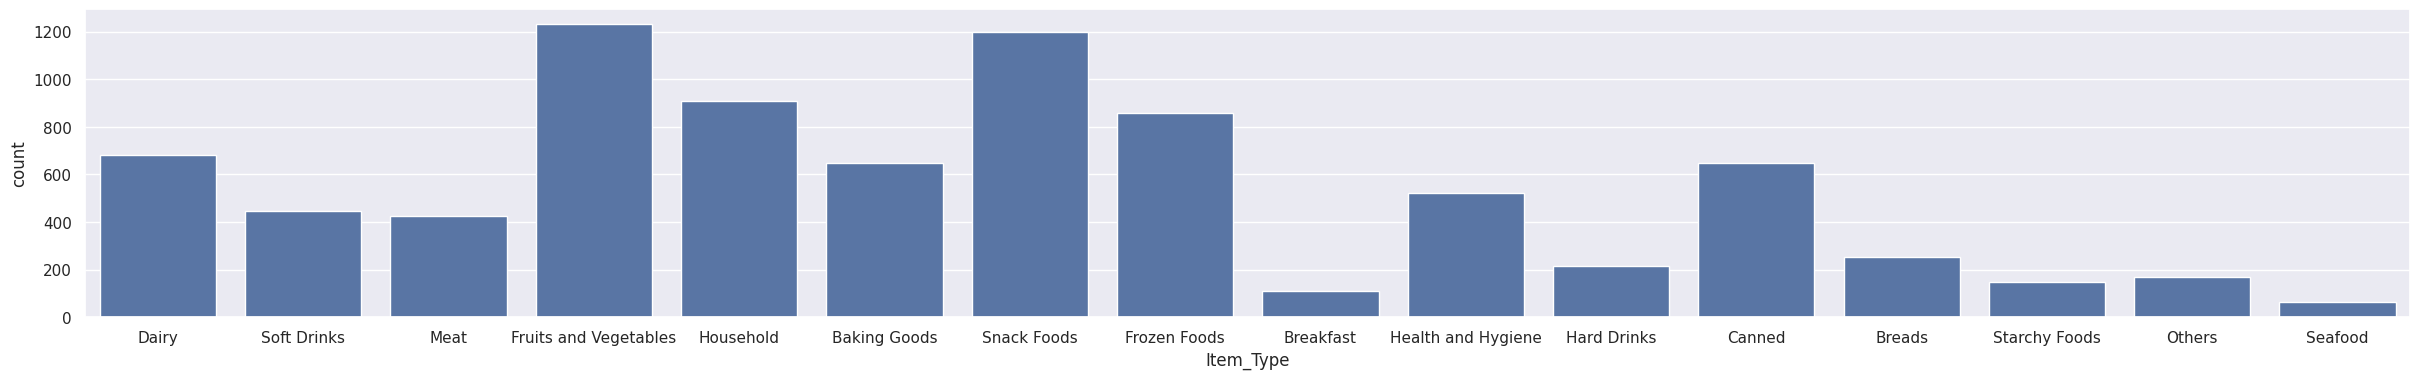

In [211]:
plt.figure(figsize=(30,4))
sns.countplot(x = df['Item_Type'])
plt.show()

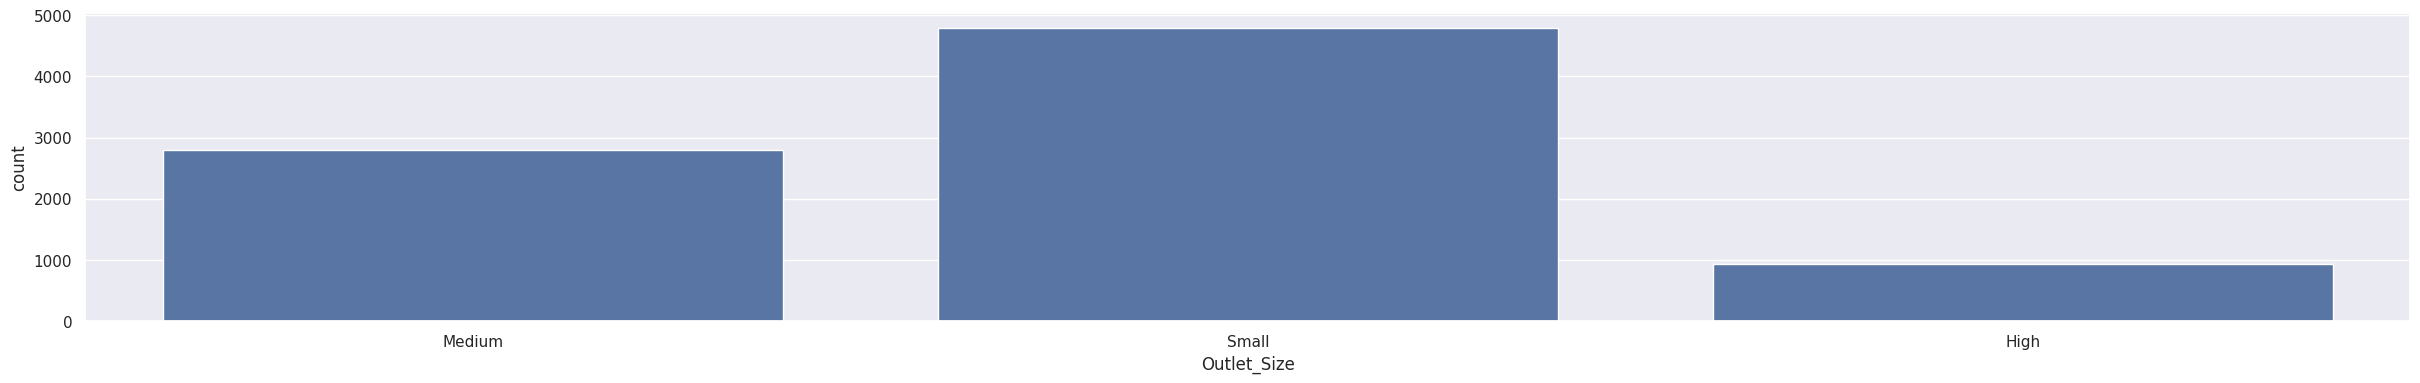

In [212]:
plt.figure(figsize=(30,4))
sns.countplot(x = 'Outlet_Size', data=df)
plt.show()

# Data Pre-processing

In [213]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace("LF","Low Fat")
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace("low fat","Low Fat")

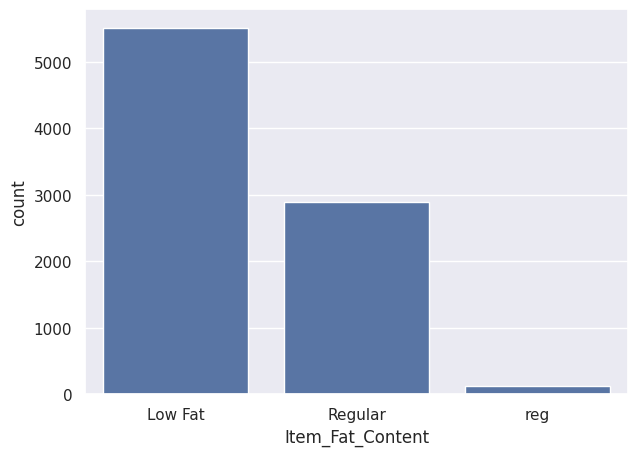

In [214]:
plt.figure(figsize=(7,5))
sns.countplot(x = df['Item_Fat_Content'])
plt.show()

In [215]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace("reg","Regular")

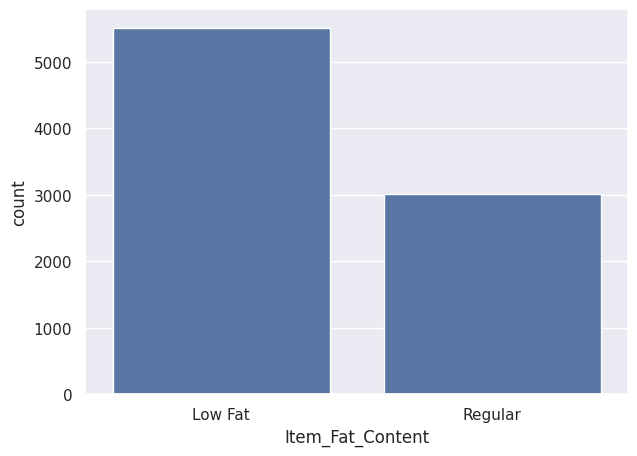

In [216]:
plt.figure(figsize=(7,5))
sns.countplot(x = df['Item_Fat_Content'])
plt.show()

## Label Encoding

In [217]:
encoder = LabelEncoder()

In [218]:
categorical_features = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for feature in categorical_features:
  df[feature] = encoder.fit_transform(df[feature])

In [219]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Splitting Features and Target

In [220]:
X = df.drop(columns="Item_Outlet_Sales")
Y = df['Item_Outlet_Sales']

In [221]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=8)

In [222]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5966, 11), (2557, 11), (5966,), (2557,))

# Machine Learning Model Training

In [290]:
regressor = XGBRegressor(
    n_estimators=150,
    max_depth=3,
    learning_rate=0.05,
    )

In [291]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [292]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [293]:
train_accuracy = metrics.r2_score(Y_train, y_pred_train)
test_accuracy = metrics.r2_score(Y_test, y_pred_test)

In [294]:
print(train_accuracy,test_accuracy)

0.6188988052222119 0.6145808399501873


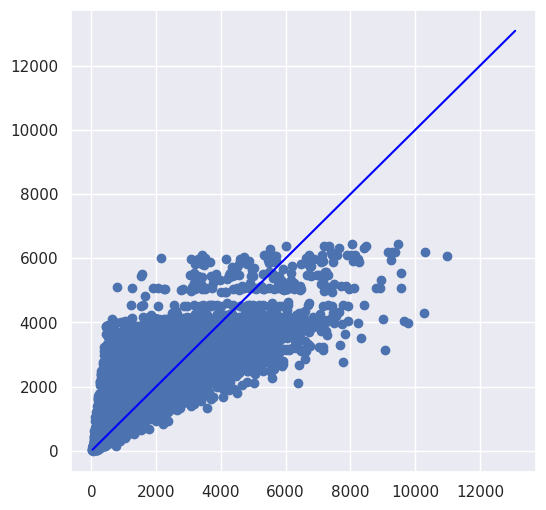

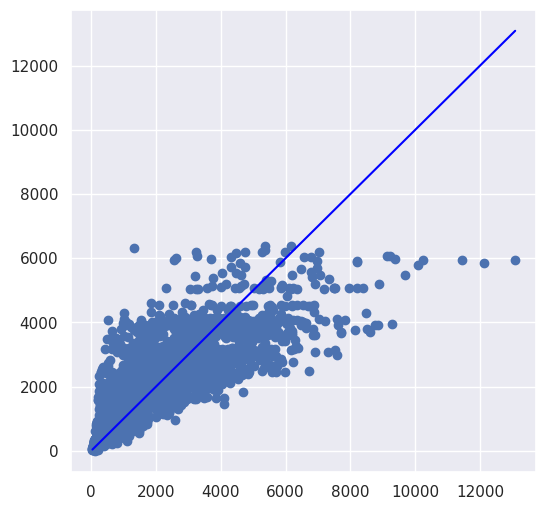

In [295]:
plt.figure(figsize=(6,6))
plt.scatter(Y_train,y_pred_train)
plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],color='blue')
plt.show()
plt.figure(figsize=(6,6))
plt.scatter(Y_test,y_pred_test)
plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],color='blue')
plt.show()